<a href="https://colab.research.google.com/github/iyeboah22/GIS-DS/blob/main/ps2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

aok presentation comments:

have better labels; is it percent or race or what?

see: https://www.amazon.com/Spirit-Level-Equality-Societies-Stronger/dp/1608193411


more comments: see below in code

In [1]:
#import libraries
import os, zipfile
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files

from google.colab import data_table
data_table.enable_dataframe_formatter()

!pip install mapclassify
import mapclassify

In [43]:
#Read in Mental health disorder data
! wget -q -O Mental_Data.csv  https://github.com/iyeboah22/GIS-DS/raw/main/Mental%20health%20Depression%20disorder%20Data.csv
mh_data = pd.read_csv('Mental_Data.csv')


<ipython-input-43-44ff2c7432ef>:3: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  mh_data = pd.read_csv('Mental_Data.csv')


In [44]:
mh_disorder = mh_data.iloc[:6468].copy()
mh_disorder.drop(columns=['index'], inplace = True)
mh_disorder.columns = ['country', 'country_code', 'year','schizophrenia', 'bipolar','eating', 'anxiety','drug_use', 'depression','alcohol_use']
mh_disorder.iloc[:, 2:] = mh_disorder.iloc[:, 2:].apply(pd.to_numeric)

<ipython-input-44-587632e8c1b3>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  mh_disorder.iloc[:, 2:] = mh_disorder.iloc[:, 2:].apply(pd.to_numeric)


In [46]:
mh_disorder[mh_disorder['year']=='2017']

Empty DataFrame
Columns: [country, country_code, year, schizophrenia, bipolar, eating, anxiety, drug_use, depression, alcohol_use]
Index: []

In [47]:
mh_disorder

country country_code  year  schizophrenia   bipolar    eating  \
0     Afghanistan          AFG  1990       0.160560  0.697779  0.101855   
1     Afghanistan          AFG  1991       0.160312  0.697961  0.099313   
2     Afghanistan          AFG  1992       0.160135  0.698107  0.096692   
3     Afghanistan          AFG  1993       0.160037  0.698257  0.094336   
4     Afghanistan          AFG  1994       0.160022  0.698469  0.092439   
...           ...          ...   ...            ...       ...       ...   
6463     Zimbabwe          ZWE  2013       0.155670  0.607993  0.117248   
6464     Zimbabwe          ZWE  2014       0.155993  0.608610  0.118073   
6465     Zimbabwe          ZWE  2015       0.156465  0.609363  0.119470   
6466     Zimbabwe          ZWE  2016       0.157111  0.610234  0.121456   
6467     Zimbabwe          ZWE  2017       0.157963  0.611242  0.124443   

       anxiety  drug_use  depression  alcohol_use  
0     4.828830  1.677082    4.071831     0.672404  
1     4.829740  1.684746    4.079531     0.671768  
2     4.831108  1.694334    4.088358     0.670644  
3     4.830864  1.705320    4.096190     0.669738  
4     4.829423  1.716069    4.099582     0.669260  
...        ...       ...         ...          ...  
6463  3.090168  0.766280    3.128192     1.515641  
6464  3.093964  0.768914    3.140290     1.515470  
6465  3.098687  0.771802    3.155710     1.514751  
6466  3.104294  0.772275    3.174134     1.513269  
6467  3.110926  0.772648    3.192789     1.510943  

[6468 rows x 10 columns]

In [ ]:

#Read in country coordinates
! wget -q -O countries.csv  https://github.com/iyeboah22/GIS-DS/raw/main/countries%202.csv #aok: there is no such data file countries_2.csv in github! you need to upload it first
countries_coord =pd.read_csv('countries.csv')
countries_coord

country   latitude  longitude                  name
0        AD  42.546245   1.601554               Andorra
1        AE  23.424076  53.847818  United Arab Emirates
2        AF  33.939110  67.709953           Afghanistan
3        AG  17.060816 -61.796428   Antigua and Barbuda
4        AI  18.220554 -63.068615              Anguilla
..      ...        ...        ...                   ...
240      YE  15.552727  48.516388                 Yemen
241      YT -12.827500  45.166244               Mayotte
242      ZA -30.559482  22.937506          South Africa
243      ZM -13.133897  27.849332                Zambia
244      ZW -19.015438  29.154857              Zimbabwe

[245 rows x 4 columns]

In [ ]:
#let's rename the columns to something shorter
col_names = {'Entity': 'name',
             'Code': 'code',
             'Year' : 'year',
             'Schizophrenia (%)':'schizo',
             'Bipolar disorder (%)':'bipolar',
             'Eating disorders (%)' : 'eating dis',
             'Anxiety disorders (%)' : 'anxiety',
             'Drug use disorders (%)':'drug',
             'Depression (%)':'depres',
             'Alcohol use disorders (%)':'alcohol'}

mh_data.rename(columns=col_names,inplace=True)

mh_data['schizo'] = pd.to_numeric(mh_data['schizo'], errors='coerce')
mh_data['bipolar'] = pd.to_numeric(mh_data['bipolar'], errors='coerce')
mh_data['eating dis'] = pd.to_numeric(mh_data['eating dis'], errors='coerce')



mh_data = mh_data.drop(columns= ['index'])
print(mh_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108553 entries, 0 to 108552
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   name        108553 non-null  object 
 1   code        103141 non-null  object 
 2   year        108553 non-null  object 
 3   schizo      25872 non-null   float64
 4   bipolar     19404 non-null   float64
 5   eating dis  100234 non-null  float64
 6   anxiety     6468 non-null    float64
 7   drug        6468 non-null    float64
 8   depres      6468 non-null    float64
 9   alcohol     6468 non-null    float64
dtypes: float64(7), object(3)
memory usage: 8.3+ MB
None


In [ ]:
#Dropping the rows which have non-numerical data, and so we concentrate on the rows up to 6467 for now
mh_data = mh_data.dropna()
mh_data

name code  year    schizo   bipolar  eating dis   anxiety  \
0     Afghanistan  AFG  1990  0.160560  0.697779    0.101855  4.828830   
1     Afghanistan  AFG  1991  0.160312  0.697961    0.099313  4.829740   
2     Afghanistan  AFG  1992  0.160135  0.698107    0.096692  4.831108   
3     Afghanistan  AFG  1993  0.160037  0.698257    0.094336  4.830864   
4     Afghanistan  AFG  1994  0.160022  0.698469    0.092439  4.829423   
...           ...  ...   ...       ...       ...         ...       ...   
6463     Zimbabwe  ZWE  2013  0.155670  0.607993    0.117248  3.090168   
6464     Zimbabwe  ZWE  2014  0.155993  0.608610    0.118073  3.093964   
6465     Zimbabwe  ZWE  2015  0.156465  0.609363    0.119470  3.098687   
6466     Zimbabwe  ZWE  2016  0.157111  0.610234    0.121456  3.104294   
6467     Zimbabwe  ZWE  2017  0.157963  0.611242    0.124443  3.110926   

          drug    depres   alcohol  
0     1.677082  4.071831  0.672404  
1     1.684746  4.079531  0.671768  
2     1.694334  4.088358  0.670644  
3     1.705320  4.096190  0.669738  
4     1.716069  4.099582  0.669260  
...        ...       ...       ...  
6463  0.766280  3.128192  1.515641  
6464  0.768914  3.140290  1.515470  
6465  0.771802  3.155710  1.514751  
6466  0.772275  3.174134  1.513269  
6467  0.772648  3.192789  1.510943  

[5488 rows x 10 columns]

In [ ]:
print(mh_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5488 entries, 0 to 6467
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        5488 non-null   object 
 1   code        5488 non-null   object 
 2   year        5488 non-null   object 
 3   schizo      5488 non-null   float64
 4   bipolar     5488 non-null   float64
 5   eating dis  5488 non-null   float64
 6   anxiety     5488 non-null   float64
 7   drug        5488 non-null   float64
 8   depres      5488 non-null   float64
 9   alcohol     5488 non-null   float64
dtypes: float64(7), object(3)
memory usage: 471.6+ KB
None


In [ ]:
#Using lat and long to get geo points
countries_coord = gpd.GeoDataFrame(countries_coord, geometry=gpd.points_from_xy(countries_coord.latitude, countries_coord.longitude))
countries_coord.head()
mh_data.head()


country   latitude  longitude                  name  \
0      AD  42.546245   1.601554               Andorra   
1      AE  23.424076  53.847818  United Arab Emirates   
2      AF  33.939110  67.709953           Afghanistan   
3      AG  17.060816 -61.796428   Antigua and Barbuda   
4      AI  18.220554 -63.068615              Anguilla   

                     geometry  
0    POINT (42.54624 1.60155)  
1   POINT (23.42408 53.84782)  
2   POINT (33.93911 67.70995)  
3  POINT (17.06082 -61.79643)  
4  POINT (18.22055 -63.06862)

name code  year    schizo   bipolar  eating dis   anxiety      drug  \
0  Afghanistan  AFG  1990  0.160560  0.697779    0.101855  4.828830  1.677082   
1  Afghanistan  AFG  1991  0.160312  0.697961    0.099313  4.829740  1.684746   
2  Afghanistan  AFG  1992  0.160135  0.698107    0.096692  4.831108  1.694334   
3  Afghanistan  AFG  1993  0.160037  0.698257    0.094336  4.830864  1.705320   
4  Afghanistan  AFG  1994  0.160022  0.698469    0.092439  4.829423  1.716069   

     depres   alcohol  
0  4.071831  0.672404  
1  4.079531  0.671768  
2  4.088358  0.670644  
3  4.096190  0.669738  
4  4.099582  0.669260

In [ ]:
mh_data = mh_data[mh_data['year']=='2017']

In [ ]:
country_mh = mh_data.merge(countries_coord, on='name',how='outer',indicator=True)

country_mh #aok then sort on merge by clicking column header for it, and browse nonmerges
#indeed multiple mistakes! eg congo, cote de ivore etc etc
#ideally should fix it; can say that for simplicity just dropping nonmerges
#but at the very minimum have to be aware of mistakes and note it!!!

In [ ]:
country_mh = country_mh.reset_index().dropna().set_index('year')

country_mh

index         COUNTRY code    schizo   bipolar  eating dis   anxiety  \
year                                                                         
2017      0     Afghanistan  AFG  0.166158  0.708089    0.107142  4.882481   
2017      1         Albania  ALB  0.201025  0.704480    0.174046  3.385245   
2017      2         Algeria  DZA  0.197913  0.818687    0.213612  5.065876   
2017      3  American Samoa  ASM  0.248557  0.468305    0.177808  3.315834   
2017      4         Andorra  AND  0.263512  0.963331    0.644559  5.305375   
...     ...             ...  ...       ...       ...         ...       ...   
2017    190       Venezuela  VEN  0.205537  0.779803    0.282690  2.866789   
2017    191         Vietnam  VNM  0.244663  0.552653    0.128466  2.066871   
2017    193           Yemen  YEM  0.171691  0.735682    0.132623  4.857207   
2017    194          Zambia  ZMB  0.165866  0.605972    0.142768  3.599714   
2017    195        Zimbabwe  ZWE  0.157963  0.611242    0.124443  3.110926   

          drug    depres   alcohol ISO   latitude   longitude  \
year                                                            
2017  2.473934  4.136347  0.661217  AF  33.939110   67.709953   
2017  0.517614  2.208414  1.837955  AL  41.153332   20.168331   
2017  1.717218  3.661094  0.665191  DZ  28.033886    1.659626   
2017  0.772801  2.939668  1.142277  AS -14.270972 -170.132217   
2017  0.910066  3.729532  1.256050  AD  42.546245    1.601554   
...        ...       ...       ...  ..        ...         ...   
2017  0.645770  2.814584  1.370216  VE   6.423750  -66.589730   
2017  0.693534  2.879450  1.739466  VN  14.058324  108.277199   
2017  1.414725  4.012346  0.634413  YE  15.552727   48.516388   
2017  0.515972  3.641811  1.633243  ZM -13.133897   27.849332   
2017  0.772648  3.192789  1.510943  ZW -19.015438   29.154857   

                      geometry _merge  
year                                   
2017     POINT (33.939 67.710)   both  
2017     POINT (41.153 20.168)   both  
2017      POINT (28.034 1.660)   both  
2017  POINT (-14.271 -170.132)   both  
2017      POINT (42.546 1.602)   both  
...                        ...    ...  
2017     POINT (6.424 -66.590)   both  
2017    POINT (14.058 108.277)   both  
2017     POINT (15.553 48.516)   both  
2017    POINT (-13.134 27.849)   both  
2017    POINT (-19.015 29.155)   both  

[183 rows x 15 columns]

In [ ]:
country_mh.rename(columns = {'country':'ISO'}, inplace = True)
country_mh.rename(columns = {'name':'COUNTRY'}, inplace = True)
country_mh.head()

In [ ]:
! wget -q -O world.zip https://github.com/iyeboah22/GIS-DS/raw/main/World_Countries_Generalized.zip

zip_ref = zipfile.ZipFile('world.zip', 'r');
zip_ref.extractall();
zip_ref.close();

world_map = gpd.read_file('World_Countries_Generalized/World_Countries_Generalized.shp')

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   FID         251 non-null    int64   
 1   COUNTRY     251 non-null    object  
 2   ISO         251 non-null    object  
 3   COUNTRYAFF  250 non-null    object  
 4   AFF_ISO     250 non-null    object  
 5   SHAPE_Leng  251 non-null    float64 
 6   SHAPE_Area  251 non-null    float64 
 7   geometry    251 non-null    geometry
dtypes: float64(2), geometry(1), int64(1), object(4)
memory usage: 15.8+ KB


<Axes: >

<Axes: >

[]

[]

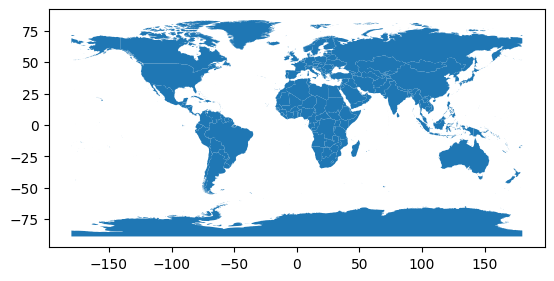

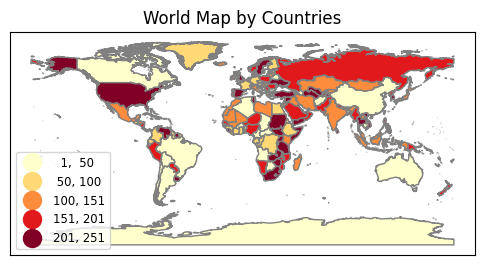

In [ ]:
world_map.info()
world_map.plot()

fig, ax = plt.subplots(1, figsize=(6,10))
world_map.plot(ax=ax,column='FID',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
#leg1 = ax.get_legend()
#leg1.set_title('''Population Density
#2010 (pers/sq mi)''')
ax.title.set_text("World Map by Countries")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

aok: make map bigger, lines thinner, interpret it!!! have title and legend that explain what it is!

In [ ]:
mh_map = pd.merge(world_map,country_mh, on='COUNTRY')

mh_map = mh_map.drop("ISO_y",axis=1)
mh_map = mh_map.drop("geometry_y",axis=1)

mh_map.rename(columns = {'ISO_x':'ISO'}, inplace = True)
mh_map.rename(columns = {'geometry_x':'geometry'}, inplace = True)

mh_map = mh_map.dropna()
mh_map = mh_map.astype({"schizo":'int64', "bipolar":'int64', "eating dis":'int64', "anxiety":'int64',
                                 "drug":'int64', "depres":'int64', "depres":'int64', "alcohol":'int64'})

mh_map.info()

<Axes: >

[]

[]

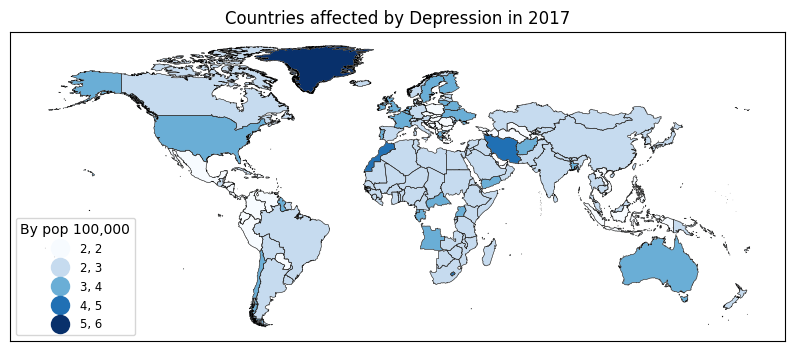

In [ ]:
#mh_map.plot(figsize=(10,12),column='depres',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         #edgecolor='grey',linewidth=1,legend_kwds= {"fmt": "{:,.0f}"})


ax = mh_map.boundary.plot(edgecolor='black', linewidth=0.2, figsize=(10, 5))
mh_map.plot(ax=ax,column='depres',legend=True,cmap='Blues',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.5,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
ax.title.set_text("Countries affected by Depression in 2017")
leg1 = ax.get_legend()
leg1.set_title('''By pop 100,000''')
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks

aok: again same thing here!

/usr/local/lib/python3.10/dist-packages/mapclassify/classifiers.py:686: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 4.
  self._classify()


<Axes: >

[]

[]

Text(0.5, 1.0, 'Countries affected by Drug Abuse in 2017')

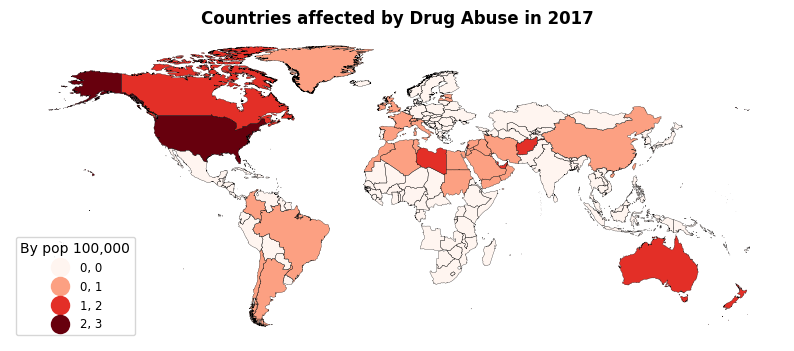

In [ ]:
ax = mh_map.boundary.plot(edgecolor='black', linewidth=0.2, figsize=(10, 5))
mh_map.plot(ax=ax, column='drug', legend=True, cmap='Reds', scheme='natural_breaks', k=5, legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4})

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

leg1 = ax.get_legend()
leg1.set_title('''By pop 100,000''')

ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks

for edge in ['right', 'bottom', 'top', 'left']:
    ax.spines[edge].set_visible(False)

ax.set_title('Countries affected by Drug Abuse in 2017', size=12, weight='bold')




In [ ]:
mh_map.drug.hist()

<Axes: >

[]

[]

<Axes: >

[]

[]

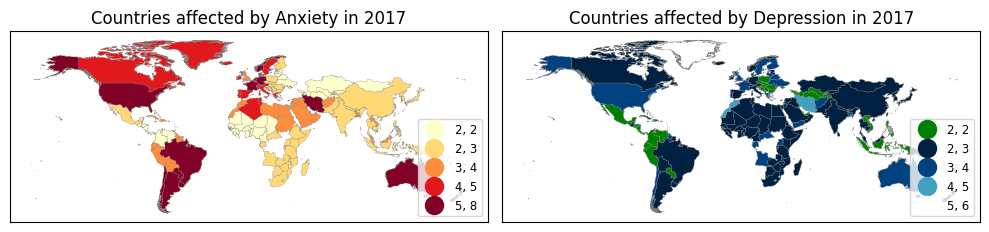

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(10,10),sharey=True, tight_layout=True)
mh_map.plot(ax=axs[0],column='anxiety',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[0].title.set_text("Countries affected by Anxiety in 2017")
axs[0].set_xticks([]); axs[0].set_yticks([])

mh_map.plot(ax=axs[1],column='depres',legend=True,cmap='ocean',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[1].title.set_text("Countries affected by Depression in 2017")
axs[1].set_xticks([]); axs[1].set_yticks([])

In [ ]:
mh_map1 = mh_map.copy()

mh_map1["geometry"] = mh_map1["geometry"].centroid
mh_map1.head(3)
mh_map1.plot()

<Axes: >

/usr/local/lib/python3.10/dist-packages/mapclassify/classifiers.py:686: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 4.
  self._classify()


<Axes: >

[]

[]

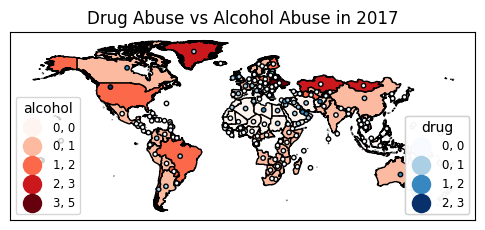

In [ ]:
fig, ax = plt.subplots(1, figsize=(6,10))
mh_map.plot(ax=ax,column='alcohol',legend=True,cmap='Reds',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4})

l1 = ax.get_legend()
l1.set_title('''alcohol''')

mh_map1.plot(ax=ax,column='drug',legend=True,cmap='Blues',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4},
         markersize = 10)

ax.title.set_text("Drug Abuse vs Alcohol Abuse in 2017")
ax.set_xticks([]); ax.set_yticks([])

l2 = ax.get_legend()
l2.set_title('''drug''')



ax.add_artist(l2)
ax.add_artist(l1)

In [ ]:
#Read in Suicide data
! wget -q -O suicide_data.csv  https://github.com/iyeboah22/GIS-DS/raw/main/DP_LIVE_17102023170543791.csv

suicide_data = pd.read_csv('suicide_data.csv')

suicide_data = suicide_data.drop(['INDICATOR', 'SUBJECT', 'FREQUENCY', 'MEASURE', 'TIME', 'Flag Codes'], axis=1)


In [ ]:
suicide_data.info()
countries_coord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LOCATION  41 non-null     object 
 1   Value     41 non-null     float64
dtypes: float64(1), object(1)
memory usage: 784.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    244 non-null    object 
 1   latitude   244 non-null    float64
 2   longitude  244 non-null    float64
 3   name       245 non-null    object 
dtypes: float64(2), object(2)
memory usage: 7.8+ KB


In [ ]:
#suicide_data.drop(['C', 'D'], axis=1)

suicide_names = {'LOCATION': 'country'}


suicide_data.rename(columns=suicide_names,inplace=True)

suicide_data = pd.merge(suicide_data, countries_coord, on='country', on)

#uicide_map.dropna(subset='Value')


suicide_data
#suicide_data.plot("FID")


#suicide_data['suicide rate'] = pd.to_numeric(suicide_data['suicide rate'], errors='coerce')

Empty DataFrame
Columns: [country, Value, latitude, longitude, name]
Index: []

In [ ]:
suicide_data['2017'] = suicide_data.to_numeric(suicide_data['2017'])

AttributeError: ignored

In [ ]:
#aok comment out everything or none

# create list of countries for North America to extract these into a separate dataframe
#country_na = ['United States','Mexico', 'Greenland','Canada',
                  #'Cuba','Jamaica',
                  #'Panama','Haiti',
                  #'Puerto Rico','Costa Rica',
                  #'Dominican Republic','Guatemala',
                  #'Honduras','Belize',
                 #'The Bahamas...','Nicaragua',
                  #'Martinique','Sint Maarten','Turks and Caicos Islands',
                  #'Grenada','Saint Kitts and Nevis','Cayman Islands',
                  #United States Minor Outlying Islands','Antigua Barbuda','Anguilla',
                  #'Dominica','Saint Lucia','Saint Vincet and the Grenadines',
                  #'British Virgins Islands','Saint Pierre and Miquelon','United States Virgin Islands',
                  #'Saint Barthelemy','Momtserrat','Saint Martin']


#na = geo_mh[geo_mh['name'].isin(country_na)]

#print(usa)
#na.head(500)